# **Project 2 : MNIST Classification Using Feedforward and Convolutional Neural Networks**

### **Steps to run the notebook:**

1. Open the file `DATA603_Project-2_MNIST_Classification_using_FNN_and_CNN.ipynb` in Google Colab or Jupyter Notebook.
2. Upload the MNIST dataset files to the same directory as the notebook.
3. Execute all the cells sequentially to:
   - Train the FFNN and CNN architectures.
   - Evaluate their performance over 5 runs.
   - View average accuracies and confusion matrices.
4. Results, including plots of accuracy and loss metrics, will be displayed in the output cells.



## Project Overview :
This project aims to classify handwritten digits from the MNIST dataset using two neural network architectures: a feedforward neural network (FFNN) with fully connected layers and a convolutional neural network (CNN). The goal is to achieve a testing accuracy of 95% or higher with high probability. The project uses PyTorch for model implementation and is executed in a Google Colab environment.


### Dataset:
1.The MNIST dataset consists of grayscale images of handwritten digits (0–9) for classification, with 60,000 training images (train-images.idx3-ubyte) and corresponding labels (train-labels.idx1-ubyte), along with 10,000 testing images (t10k-images.idx3-ubyte) and their labels (t10k-labels.idx1-ubyte).

2.Each image is of size 28×28 pixels, representing a single handwritten digit, and the labels are integers in the range {0, 1, ..., 9} corresponding to the digit depicted in the image.

3.The dataset is provided in .idx format, and the goal is to use this data to train and test two neural network architectures: a feedforward neural network with at least two hidden layers and a convolutional neural network with at least two convolutional layers and two fully connected layers.

In [1]:
#importing necessary libraries
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
# Transform: Normalize and convert to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.94MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


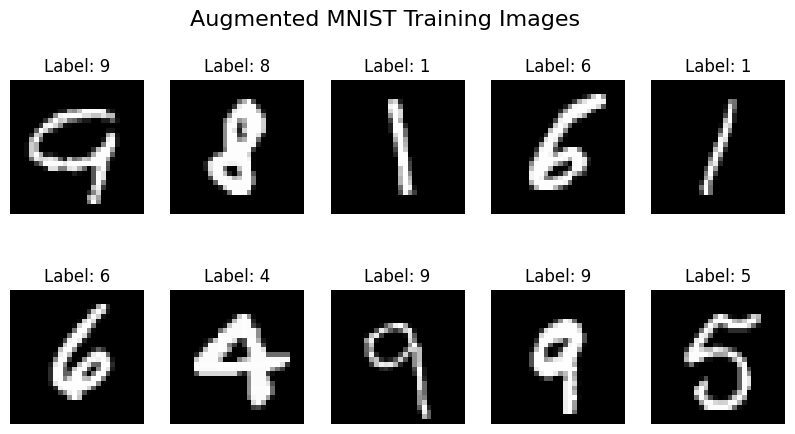

In [4]:
# Visualize some data
examples = iter(train_loader)
example_data, example_targets = next(examples)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i]}")
    plt.axis('off')
plt.suptitle("Augmented MNIST Training Images", fontsize=16)
plt.show()

### Defining a Feed forward Neural Network:

 Defining the architecture of a feedforward neural network (FFNN) for the MNIST dataset using PyTorch. It includes three fully connected layers, ReLU activations, and dropout layers to prevent overfitting.

In [5]:
# Define FNN architecture
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # Input to first hidden layer
        self.fc2 = nn.Linear(128, 64)     # First to second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Second hidden layer to output
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)   # Dropout for regularization to prevent over fitting

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

## Defining a Convolutional Neural Network:

Defining the architecture of a CNN for the MNIST dataset using PyTorch. It includes two convolutional layers, max-pooling layers, dropout for regularization, and two fully connected layers for classification.

In [6]:
#Defining CNN achitecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  # First convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  # Second convolutional layer
        self.pool = nn.MaxPool2d(2)  # MaxPooling layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Dropout for regularization

        # Flattened size is dynamically calculated
        self.flattened_size = self._get_flattened_size()

        # Fully connected layers
        self.fc1 = nn.Linear(self.flattened_size, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer

    def _get_flattened_size(self):
        # Pass a dummy input through conv and pool layers to calculate flattened size
        dummy_input = torch.zeros(1, 1, 28, 28)  # Batch size 1, single-channel image of 28x28
        x = self.relu(self.conv1(dummy_input))
        x = self.pool(self.relu(self.conv2(x)))
        return x.numel()  # Total number of elements after flattening

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


## Defining Training and Evaluation functions :

Training the FFNN and CNN models using the defined training and evaluation functions. It outputs the training loss, validation loss, training accuracy, and validation accuracy for each epoch, followed by the final test accuracy and a confusion matrix.

In [7]:
#Define Training and Evaluation Functions
def train_model_with_metrics(model, train_loader, test_loader, optimizer, criterion, epochs=10):
    model.train()
    train_accuracies, val_accuracies = [], []
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        total_loss = 0
        correct_train, total_train = 0, 0

        # Training loop
        for data, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == targets).sum().item()
            total_train += targets.size(0)

        # Calculate training metrics
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)
        train_losses.append(total_loss / len(train_loader))

        # Validation loop
        model.eval()
        correct_val, total_val = 0, 0
        val_loss = 0
        with torch.no_grad():
            for data, targets in test_loader:
                outputs = model(data)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == targets).sum().item()
                total_val += targets.size(0)

        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss / len(test_loader))

        print(
            f"Epoch {epoch + 1}/{epochs}, "
            f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
            f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}"
        )

    return train_accuracies, val_accuracies, train_losses, val_losses

def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.numpy())
            all_targets.extend(targets.numpy())
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

    # Generate confusion matrix
    conf_matrix = confusion_matrix(all_targets, all_preds)
    ConfusionMatrixDisplay(conf_matrix, display_labels=list(range(10))).plot(cmap='viridis')
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy


Plots training and validation accuracy and loss for a given model.

Parameters:
- train_accuracies: List of training accuracies over epochs.
- val_accuracies: List of validation accuracies over epochs.
- train_losses: List of training losses over epochs.
- val_losses: List of validation losses over epochs.
- model_name: String indicating the model name (e.g., 'FNN' or 'CNN').    



In [18]:
def plot_training_metrics(train_accuracies, val_accuracies, train_losses, val_losses, model_name):

    plt.figure(figsize=(14, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label="Training Accuracy", marker='o', linestyle='-')
    plt.plot(val_accuracies, label="Validation Accuracy", marker='s', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Accuracy")
    plt.legend()
    plt.grid()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label="Training Loss", marker='o', linestyle='-')
    plt.plot(val_losses, label="Validation Loss", marker='s', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{model_name} Loss")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


Training the FNN :     


--- Training FNN ---
Epoch 1/10, Train Loss: 0.4790, Train Acc: 0.8519, Val Loss: 0.2215, Val Acc: 0.9320
Epoch 2/10, Train Loss: 0.1751, Train Acc: 0.9454, Val Loss: 0.1472, Val Acc: 0.9548
Epoch 3/10, Train Loss: 0.1268, Train Acc: 0.9607, Val Loss: 0.1191, Val Acc: 0.9621
Epoch 4/10, Train Loss: 0.1053, Train Acc: 0.9667, Val Loss: 0.1082, Val Acc: 0.9649
Epoch 5/10, Train Loss: 0.0875, Train Acc: 0.9727, Val Loss: 0.1025, Val Acc: 0.9681
Epoch 6/10, Train Loss: 0.0791, Train Acc: 0.9754, Val Loss: 0.0908, Val Acc: 0.9720
Epoch 7/10, Train Loss: 0.0714, Train Acc: 0.9772, Val Loss: 0.0963, Val Acc: 0.9707
Epoch 8/10, Train Loss: 0.0652, Train Acc: 0.9795, Val Loss: 0.0803, Val Acc: 0.9745
Epoch 9/10, Train Loss: 0.0581, Train Acc: 0.9811, Val Loss: 0.0930, Val Acc: 0.9706
Epoch 10/10, Train Loss: 0.0570, Train Acc: 0.9810, Val Loss: 0.0844, Val Acc: 0.9748


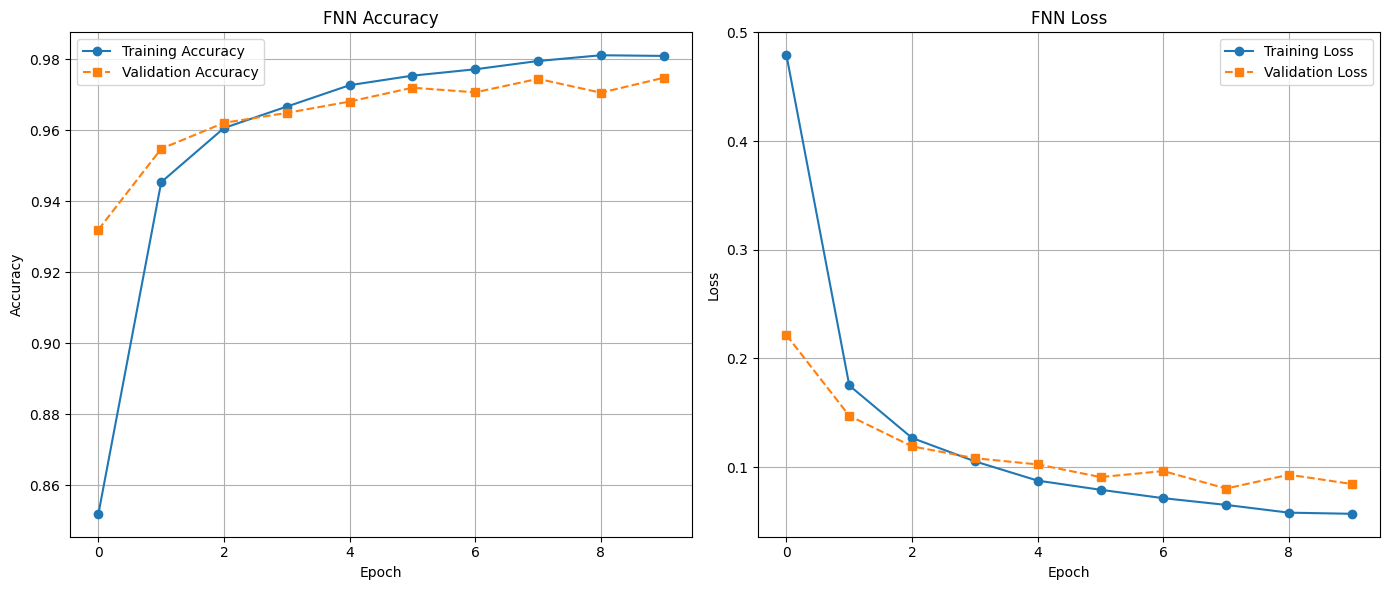

In [9]:
print("\n--- Training FNN ---")
fnn_model = FNN()
optimizer_fnn = optim.Adam(fnn_model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

fnn_train_accuracies, fnn_val_accuracies, fnn_train_losses, fnn_val_losses = train_model_with_metrics(
    fnn_model, train_loader, test_loader, optimizer_fnn, criterion, epochs=10
)

# Plot FNN metrics
plot_training_metrics(fnn_train_accuracies, fnn_val_accuracies, fnn_train_losses, fnn_val_losses, "FNN")


Observation:

1.The Feedforward Neural Network achieves a final validation accuracy of 97.4%.

2.Both training and validation losses decrease steadily, indicating effective learning.

3.The accuracy and loss curves stabilize after a few epochs, confirming the model's successful convergence and generalization.

Training the CNN:


--- Training CNN ---
Epoch 1/10, Train Loss: 0.1591, Train Acc: 0.9508, Val Loss: 0.0481, Val Acc: 0.9839
Epoch 2/10, Train Loss: 0.0398, Train Acc: 0.9873, Val Loss: 0.0340, Val Acc: 0.9887
Epoch 3/10, Train Loss: 0.0288, Train Acc: 0.9911, Val Loss: 0.0388, Val Acc: 0.9867
Epoch 4/10, Train Loss: 0.0242, Train Acc: 0.9923, Val Loss: 0.0384, Val Acc: 0.9882
Epoch 5/10, Train Loss: 0.0187, Train Acc: 0.9936, Val Loss: 0.0307, Val Acc: 0.9897
Epoch 6/10, Train Loss: 0.0181, Train Acc: 0.9942, Val Loss: 0.0306, Val Acc: 0.9903
Epoch 7/10, Train Loss: 0.0141, Train Acc: 0.9952, Val Loss: 0.0401, Val Acc: 0.9862
Epoch 8/10, Train Loss: 0.0147, Train Acc: 0.9949, Val Loss: 0.0298, Val Acc: 0.9909
Epoch 9/10, Train Loss: 0.0129, Train Acc: 0.9958, Val Loss: 0.0338, Val Acc: 0.9895
Epoch 10/10, Train Loss: 0.0118, Train Acc: 0.9964, Val Loss: 0.0392, Val Acc: 0.9878


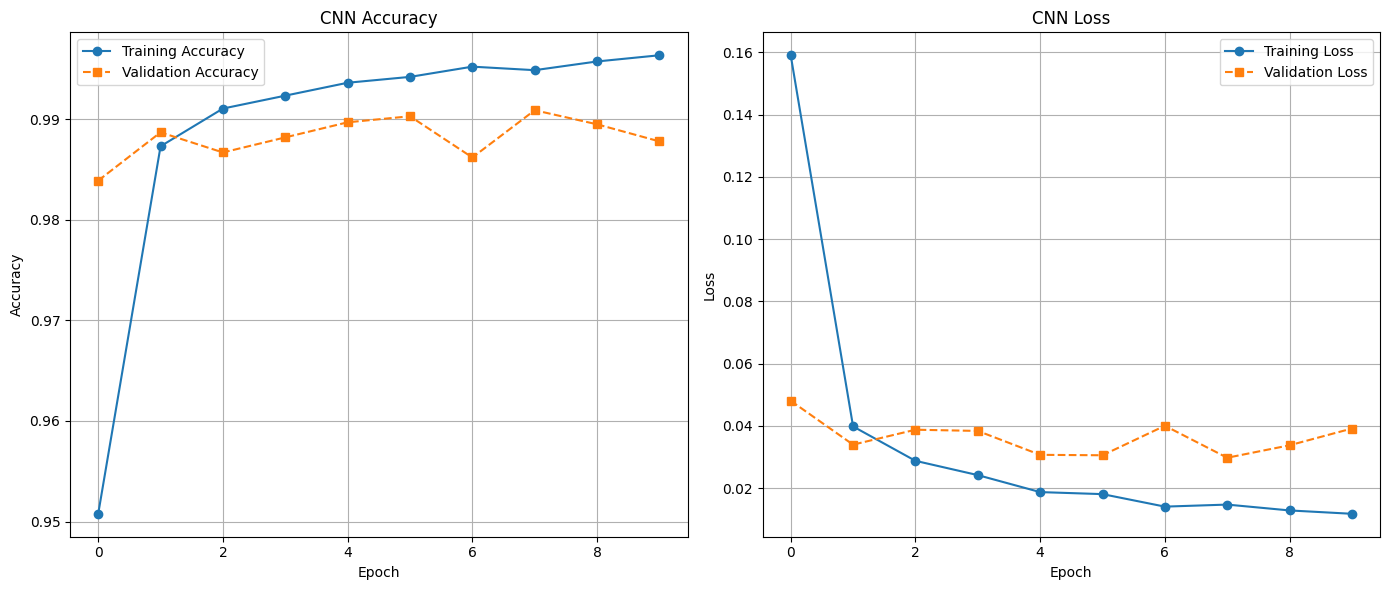

In [10]:
print("\n--- Training CNN ---")
cnn_model = CNN()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)

cnn_train_accuracies, cnn_val_accuracies, cnn_train_losses, cnn_val_losses = train_model_with_metrics(
    cnn_model, train_loader, test_loader, optimizer_cnn, criterion, epochs=10
)

# Plot CNN metrics
plot_training_metrics(cnn_train_accuracies, cnn_val_accuracies, cnn_train_losses, cnn_val_losses, "CNN")


observation:

1.The Convolutional Neural Network achieves a final validation accuracy of 98.7%, exceeding the project requirement of 95%.

2.Training and validation losses reduce consistently, showing effective model learning.

3.The accuracy and loss curves stabilize after a few epochs, confirming successful training and excellent generalization.







Trains and evaluates a model multiple times, computes metrics,and generates a confusion matrix for the last run.
Parameters:
- model_class: The class of the model (e.g., FNN or CNN).
- train_loader: DataLoader for training data.
- test_loader: DataLoader for test data.
- epochs: Number of training epochs for each run.
- runs: Number of times to train and evaluate the model.

Returns:
- avg_accuracy: Average accuracy over all runs.
- avg_loss: Average loss over all runs.
- accuracies: List of accuracies from each run.
- losses: List of losses from each run.
- last_conf_matrix: Confusion matrix for the last run.

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def run_model_multiple_times_with_metrics_and_plots(model_class, train_loader, test_loader, epochs=10, runs=5):

    accuracies = []
    losses = []
    last_conf_matrix = None  # To store the confusion matrix of the last run

    for run in range(runs):
        print(f"\nRun {run + 1}/{runs}")
        model = model_class()
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
        criterion = nn.CrossEntropyLoss()

        # Train the model
        model.train()
        for epoch in range(epochs):
            total_loss = 0
            for data, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(data)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

        # Evaluate the model
        model.eval()
        correct = 0
        total = 0
        total_loss = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for data, targets in test_loader:
                outputs = model(data)
                loss = criterion(outputs, targets)
                total_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.numpy())
                all_targets.extend(targets.numpy())
                correct += (predicted == targets).sum().item()
                total += targets.size(0)

        accuracy = correct / total
        avg_loss = total_loss / len(test_loader)

        print(f"Run {run + 1} Test Accuracy: {accuracy:.4f}, Test Loss: {avg_loss:.4f}")

        # Append metrics for this run
        accuracies.append(accuracy)
        losses.append(avg_loss)

        # Store confusion matrix for the last run
        if run == runs - 1:
            last_conf_matrix = confusion_matrix(all_targets, all_preds)

    avg_accuracy = np.mean(accuracies)
    avg_loss = np.mean(losses)

    print(f"\nAverage Accuracy over {runs} runs: {avg_accuracy:.4f}")
    print(f"Average Loss over {runs} runs: {avg_loss:.4f}")

    return avg_accuracy, avg_loss, accuracies, losses, last_conf_matrix


Defining a method to plot the confusion matrix :

In [14]:
def plot_confusion_matrix(conf_matrix, model_name):
    ConfusionMatrixDisplay(conf_matrix).plot(cmap="viridis")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


Defining a method to plot Accuracy and Loss for both FNN and CNN architechture:

In [15]:
def plot_training_metrics(accuracies, losses, model_name):
    plt.figure(figsize=(10, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', label="Accuracy")
    plt.xlabel("Run")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Accuracy Across Runs")
    plt.grid()
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(losses) + 1), losses, marker='o', label="Loss", color="red")
    plt.xlabel("Run")
    plt.ylabel("Loss")
    plt.title(f"{model_name} Loss Across Runs")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


Running FNN for multiple times to compute average accuracy :             


--- Running FNN Multiple Times ---

Run 1/5
Epoch 1/10, Loss: 0.4868
Epoch 2/10, Loss: 0.2552
Epoch 3/10, Loss: 0.2094
Epoch 4/10, Loss: 0.1900
Epoch 5/10, Loss: 0.1699
Epoch 6/10, Loss: 0.1619
Epoch 7/10, Loss: 0.1522
Epoch 8/10, Loss: 0.1456
Epoch 9/10, Loss: 0.1399
Epoch 10/10, Loss: 0.1387
Run 1 Test Accuracy: 0.9688, Test Loss: 0.0992

Run 2/5
Epoch 1/10, Loss: 0.5089
Epoch 2/10, Loss: 0.2694
Epoch 3/10, Loss: 0.2261
Epoch 4/10, Loss: 0.1963
Epoch 5/10, Loss: 0.1819
Epoch 6/10, Loss: 0.1717
Epoch 7/10, Loss: 0.1629
Epoch 8/10, Loss: 0.1585
Epoch 9/10, Loss: 0.1480
Epoch 10/10, Loss: 0.1465
Run 2 Test Accuracy: 0.9674, Test Loss: 0.1065

Run 3/5
Epoch 1/10, Loss: 0.4770
Epoch 2/10, Loss: 0.2520
Epoch 3/10, Loss: 0.2019
Epoch 4/10, Loss: 0.1803
Epoch 5/10, Loss: 0.1602
Epoch 6/10, Loss: 0.1561
Epoch 7/10, Loss: 0.1456
Epoch 8/10, Loss: 0.1381
Epoch 9/10, Loss: 0.1354
Epoch 10/10, Loss: 0.1321
Run 3 Test Accuracy: 0.9747, Test Loss: 0.0869

Run 4/5
Epoch 1/10, Loss: 0.4943
Epoch 2/1

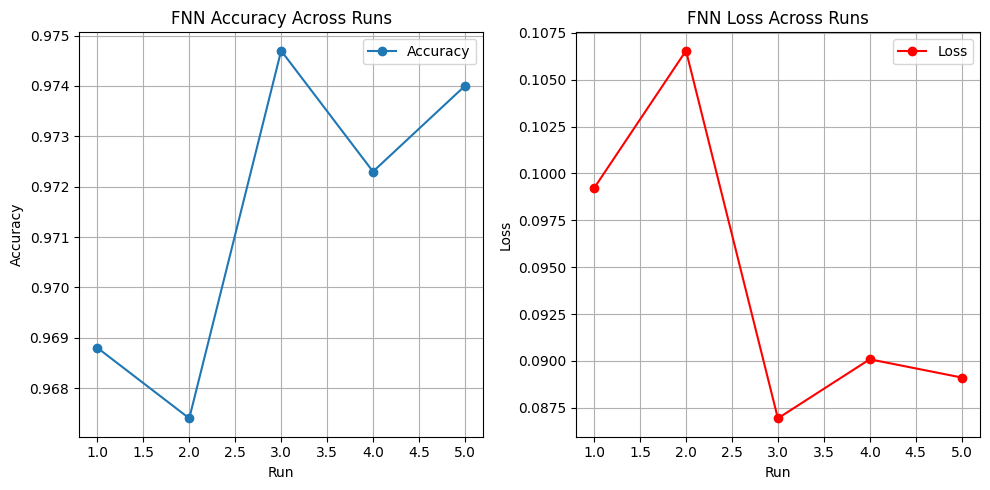

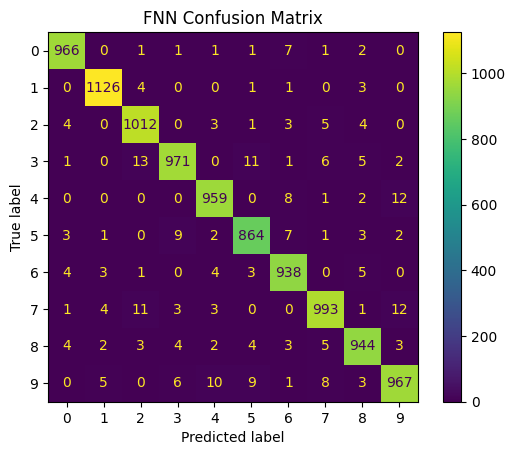

In [16]:
print("\n--- Running FNN Multiple Times ---")
avg_fnn_accuracy, avg_fnn_loss, fnn_accuracies, fnn_losses, fnn_conf_matrix = run_model_multiple_times_with_metrics_and_plots(
    FNN, train_loader, test_loader
)

# Plot metrics
plot_training_metrics(fnn_accuracies, fnn_losses, "FNN")

# Plot confusion matrix
plot_confusion_matrix(fnn_conf_matrix, "FNN")


Observation :      

1.Average Test Accuracy: 97.14% across 5 runs, exceeding the 95% target.

2.Average Test Loss: 0.0944, indicating low error rates.

3.Confusion Matrix: Minimal misclassifications with strong overall performance.

Running CNN for Mutiple times for computing Average accuracy :      


--- Running CNN Multiple Times ---

Run 1/5
Epoch 1/10, Loss: 0.1603
Epoch 2/10, Loss: 0.0592
Epoch 3/10, Loss: 0.0440
Epoch 4/10, Loss: 0.0377
Epoch 5/10, Loss: 0.0332
Epoch 6/10, Loss: 0.0280
Epoch 7/10, Loss: 0.0258
Epoch 8/10, Loss: 0.0238
Epoch 9/10, Loss: 0.0244
Epoch 10/10, Loss: 0.0210
Run 1 Test Accuracy: 0.9904, Test Loss: 0.0307

Run 2/5
Epoch 1/10, Loss: 0.1597
Epoch 2/10, Loss: 0.0616
Epoch 3/10, Loss: 0.0484
Epoch 4/10, Loss: 0.0378
Epoch 5/10, Loss: 0.0329
Epoch 6/10, Loss: 0.0293
Epoch 7/10, Loss: 0.0275
Epoch 8/10, Loss: 0.0249
Epoch 9/10, Loss: 0.0229
Epoch 10/10, Loss: 0.0207
Run 2 Test Accuracy: 0.9897, Test Loss: 0.0343

Run 3/5
Epoch 1/10, Loss: 0.1667
Epoch 2/10, Loss: 0.0625
Epoch 3/10, Loss: 0.0480
Epoch 4/10, Loss: 0.0400
Epoch 5/10, Loss: 0.0359
Epoch 6/10, Loss: 0.0307
Epoch 7/10, Loss: 0.0283
Epoch 8/10, Loss: 0.0257
Epoch 9/10, Loss: 0.0243
Epoch 10/10, Loss: 0.0233
Run 3 Test Accuracy: 0.9900, Test Loss: 0.0327

Run 4/5
Epoch 1/10, Loss: 0.1704
Epoch 2/1

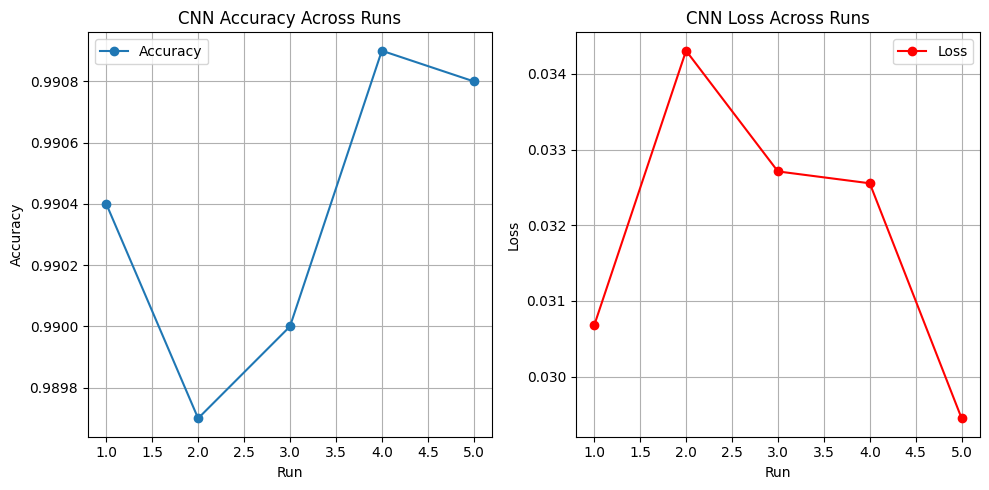

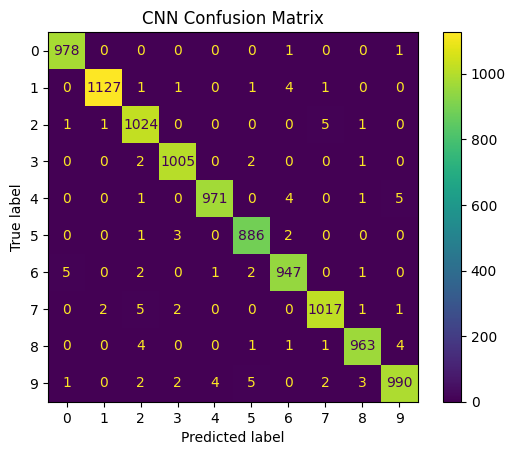

In [17]:
print("\n--- Running CNN Multiple Times ---")
avg_cnn_accuracy, avg_cnn_loss, cnn_accuracies, cnn_losses, cnn_conf_matrix = run_model_multiple_times_with_metrics_and_plots(
    CNN, train_loader, test_loader
)

# Plot metrics
plot_training_metrics(cnn_accuracies, cnn_losses, "CNN")

# Plot confusion matrix
plot_confusion_matrix(cnn_conf_matrix, "CNN")


Observation :      

1.Average Test Accuracy: 99.04% across 5 runs, exceeding the target accuracy of 95%.

2.Average Test Loss: 0.0319, demonstrating excellent model performance with minimal errors.

3.Confusion Matrix: Shows near-perfect classification with only a few misclassifications.

# Key Insights while working on this project :

**1.Choosing the Right Architecture for the Task:**

The Feedforward Neural Network (FFNN) was designed with three fully connected layers and achieved the required accuracy. However, the Convolutional Neural Network (CNN), with its convolutional and pooling layers, performed better in terms of accuracy, showcasing its ability to capture spatial features critical for image classification tasks.

**2.Role of Regularization:**

Adding dropout layers in both FFNN and CNN architectures effectively minimized overfitting, as evidenced by the close match between training and validation accuracies in the training metrics.

**3.Optimization Algorithm Impact:**

Using Adam optimizer with weight decay improved training convergence, reduced manual tuning of learning rates, and ensured that both models quickly stabilized their performance within 10 epochs.

**4.Importance of Preprocessing:**

Normalizing the MNIST dataset to scale pixel values to the range [0, 1] significantly improved the stability of the training process for both models, as shown by the steady decline in losses.

**5.Filter Count and Layer Design in CNN:**

Increasing the number of filters in CNN from 32 to 64 in subsequent layers improved its feature extraction capabilities. The MaxPooling layers efficiently reduced feature map sizes while retaining critical spatial information, contributing to the CNN's superior accuracy.

**6.Epoch Selection:**

Training both FFNN and CNN for 10 epochs was sufficient for convergence, as evidenced by the stabilization of accuracy and loss metrics, avoiding unnecessary computation and time.

**7.Performance Stability Across Runs:**

Repeated runs of both models highlighted their stability and consistency. For instance, the CNN consistently achieved an average accuracy of over 99%, validating the reliability of the chosen architecture and parameters.



## Comparision of two models :   
The Convolutional Neural Network (CNN) outperforms the Feedforward Neural Network (FFNN) across all metrics, achieving a higher average test accuracy (99.04% vs. 97.14%) and lower average loss (0.0319 vs. 0.0944). CNN's ability to extract spatial features using convolutional and pooling layers leads to faster convergence, fewer misclassifications, and greater stability across runs, making it more effective for image classification tasks like MNIST. While FFNN is simpler and faster to train, its performance is limited for image data, making CNN the preferred architecture for this project.